# Task 4 - Introspection

In [109]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL.Image
import IPython.display as display
import warnings

In [2]:
cifar10 = keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_train.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

test_data = tf.data.Dataset.from_tensor_slices(
    (x_test.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_test.astype(np.int32))).batch(64)

170500096/170498071 [==============================] - 31s 0us/step


In [3]:
learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [5]:
model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data))
model.save("introspection_model.hdf5")

Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6863 - accuracy: 0.3727 - val_loss: 1.3720 - val_accuracy: 0.5024
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 1.3215 - accuracy: 0.5245 - val_loss: 1.1615 - val_accuracy: 0.5896
Epoch 3/100
391/391 [==============================] - 3s 9ms/step - loss: 1.1737 - accuracy: 0.5788 - val_loss: 1.0794 - val_accuracy: 0.6192
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0634 - accuracy: 0.6233 - val_loss: 0.9923 - val_accuracy: 0.6566
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 0.9835 - accuracy: 0.6494 - val_loss: 0.9214 - val_accuracy: 0.6719
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 0.9257 - accuracy: 0.6731 - val_loss: 0.8592 - val_accuracy: 0.6948
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 0.8733 - accuracy: 0.6916 - val_loss: 0.8625 - val_accuracy: 0.7000

In [107]:
def plot_image(gradient,batch):
  fig,ax = plt.subplots(1,2)
  ax[0].imshow(tf.squeeze(batch))
  ax[1].imshow(tf.squeeze(gradient))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

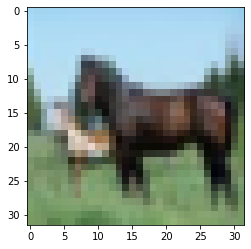

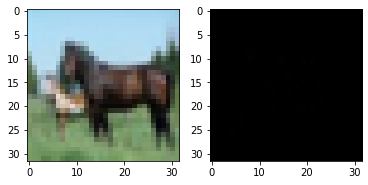

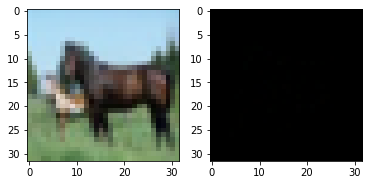

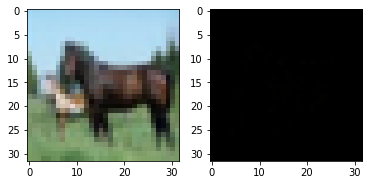

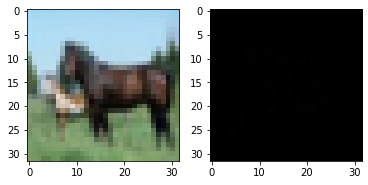

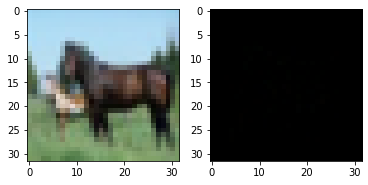

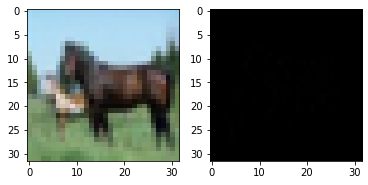

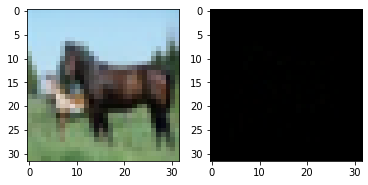

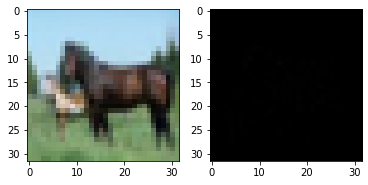

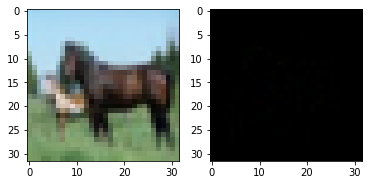

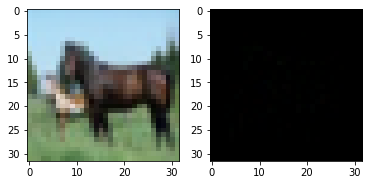

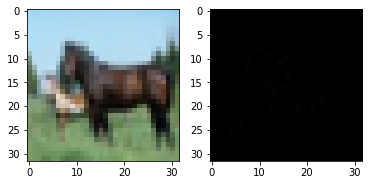

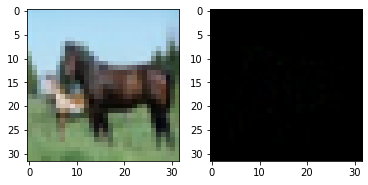

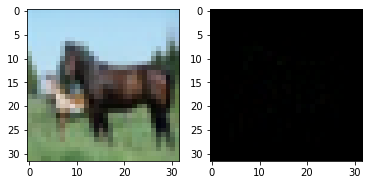

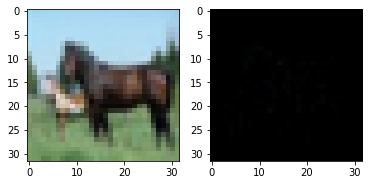

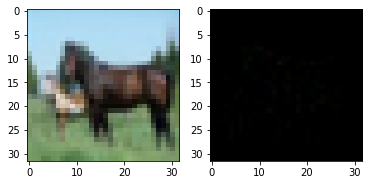

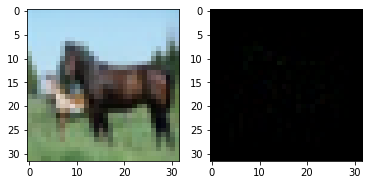

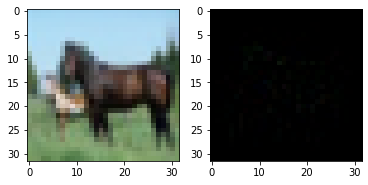

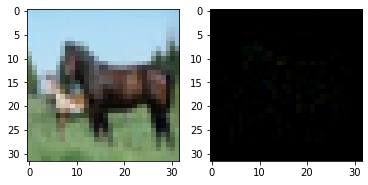

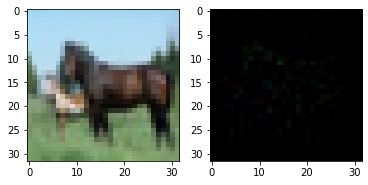

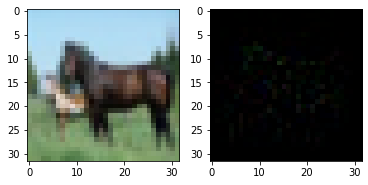

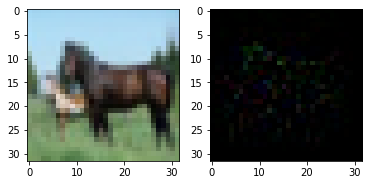

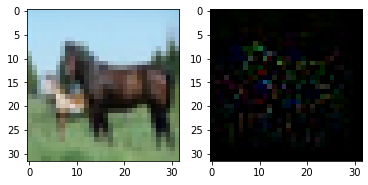

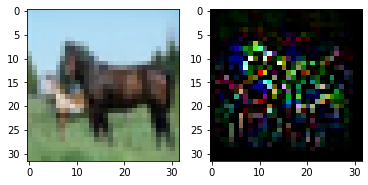

In [113]:
warnings.filterwarnings("ignore")
trial_image,trial_label = x_train[12],y_train[12]
trial_image = trial_image.reshape([-1, 32, 32, 3]).astype("float32")/255
plt.imshow(tf.squeeze(trial_image))
batch= trial_image
iterations = 23
for i in range(iterations):
  with tf.GradientTape() as tape:
      batch = tf.Variable(batch)
      logit = model(batch)
      true_lable = keras.utils.to_categorical(trial_label,10)
      loss = keras.losses.categorical_crossentropy(logit,true_lable)
      gradient = tape.gradient(loss,batch)
  batch = batch + 0.01*gradient
  with warnings.catch_warnings():
    plot_image(gradient,batch)